<a href="https://colab.research.google.com/github/RedPandaStyle/ACE-DATA201/blob/main/JPV_DATA102_CAP_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rtree as r3
import geopandas as gpd
from geopandas import GeoDataFrame
import shapely
from shapely.geometry import Point

In [2]:
#Import public data to local terminal and load into notebook
v = pd.read_csv('https://data.cityofnewyork.us/resource/h9gi-nx95.csv')
v

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2022-07-20T00:00:00.000,1:25,NaN,NaN,40.835808,-73.89083,"\n, \n(40.835808, -73.89083)",BOSTON ROAD,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4547589,Sedan,Sedan,NaN,NaN,NaN
1,2022-07-21T00:00:00.000,5:20,NaN,NaN,NaN,NaN,NaN,FDR DRIVE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4548075,Sedan,Sedan,NaN,NaN,NaN
2,2021-04-14T00:00:00.000,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
3,2021-04-13T00:00:00.000,21:35,BROOKLYN,11217.0,40.683580,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
4,2021-04-15T00:00:00.000,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-07-22T00:00:00.000,18:28,MANHATTAN,10019.0,40.763905,-73.98608,"\n, \n(40.763905, -73.98608)",NaN,NaN,322 WEST 52 STREET,...,NaN,NaN,NaN,NaN,4548458,Sedan,NaN,NaN,NaN,NaN
996,2022-07-22T00:00:00.000,8:13,NaN,NaN,40.892475,-73.85450,"\n, \n(40.892475, -73.8545)",EAST 233 STREET,NaN,NaN,...,Alcohol Involvement,Unspecified,Unspecified,Unspecified,4548870,Tractor Truck Diesel,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
997,2022-07-16T00:00:00.000,21:00,STATEN ISLAND,10310.0,40.634747,-74.11454,"\n, \n(40.634747, -74.11454)",NORTH BURGHER AVENUE,CASTLETON AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4548759,Sedan,NaN,NaN,NaN,NaN
998,2022-07-20T00:00:00.000,19:15,NaN,NaN,NaN,NaN,NaN,TRIBOROUGH BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4548480,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


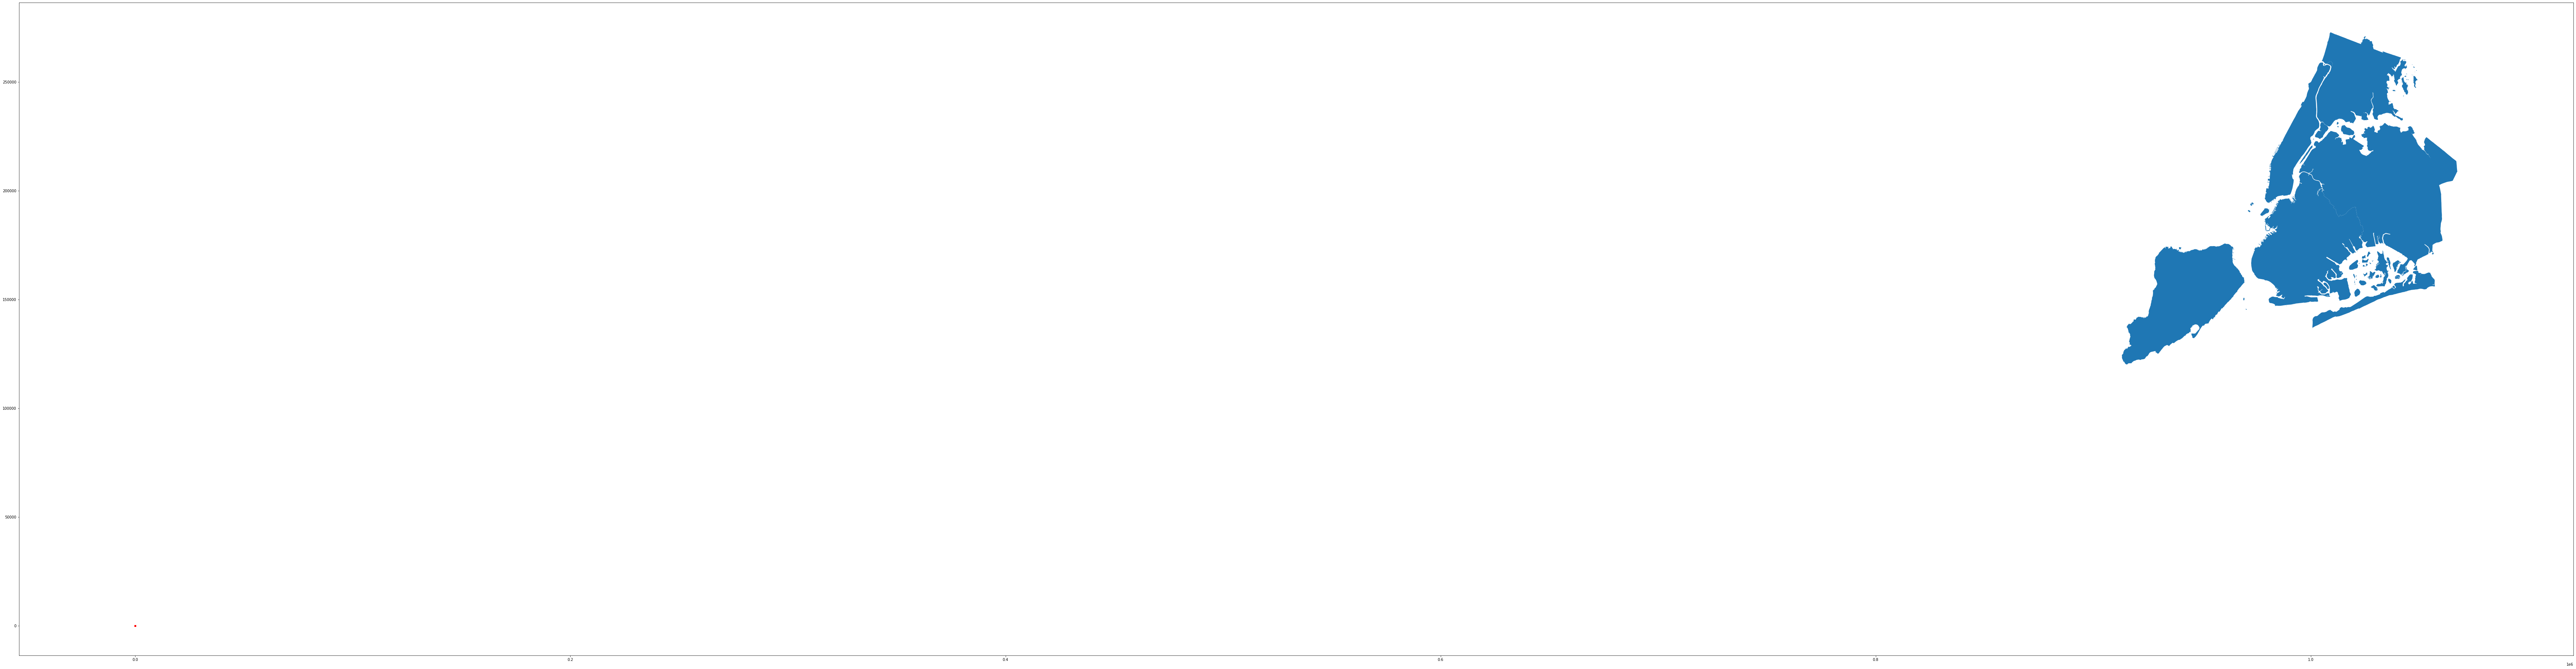

In [3]:
geometry = [Point(xy) for xy in zip(v['longitude'],v['latitude'])]
gdf = GeoDataFrame(v, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('nybb'))
gdf.plot(ax=world.plot(figsize=(125, 125)), marker='o', color='red',markersize=15);

In [4]:
v.shape

(1000, 30)

In [5]:
v.dtypes

crash_date                         object
crash_time                         object
borough                            object
zip_code                          float64
latitude                          float64
longitude                         float64
location                           object
on_street_name                     object
off_street_name                    object
cross_street_name                  object
number_of_persons_injured           int64
number_of_persons_killed            int64
number_of_pedestrians_injured       int64
number_of_pedestrians_killed        int64
number_of_cyclist_injured           int64
number_of_cyclist_killed            int64
number_of_motorist_injured          int64
number_of_motorist_killed           int64
contributing_factor_vehicle_1      object
contributing_factor_vehicle_2      object
contributing_factor_vehicle_3      object
contributing_factor_vehicle_4      object
contributing_factor_vehicle_5      object
collision_id                      

In [6]:
#List columns...
v.columns
print(*v, sep = '\n')

crash_date
crash_time
borough
zip_code
latitude
longitude
location
on_street_name
off_street_name
cross_street_name
number_of_persons_injured
number_of_persons_killed
number_of_pedestrians_injured
number_of_pedestrians_killed
number_of_cyclist_injured
number_of_cyclist_killed
number_of_motorist_injured
number_of_motorist_killed
contributing_factor_vehicle_1
contributing_factor_vehicle_2
contributing_factor_vehicle_3
contributing_factor_vehicle_4
contributing_factor_vehicle_5
collision_id
vehicle_type_code1
vehicle_type_code2
vehicle_type_code_3
vehicle_type_code_4
vehicle_type_code_5
geometry


In [7]:
#Drop data that isn't being looked at to decrease resource consumption
v1 = v.drop(['contributing_factor_vehicle_1',
'contributing_factor_vehicle_2',
'contributing_factor_vehicle_3',
'contributing_factor_vehicle_4',
'contributing_factor_vehicle_5',
'collision_id',
'vehicle_type_code1',
'vehicle_type_code2',
'vehicle_type_code_3',
'vehicle_type_code_4',
'vehicle_type_code_5'], axis=1)
v1

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry
0,2022-07-20T00:00:00.000,1:25,NaN,NaN,40.835808,-73.89083,"\n, \n(40.835808, -73.89083)",BOSTON ROAD,NaN,NaN,0,0,0,0,0,0,0,0,POINT (-73.89083 40.83581)
1,2022-07-21T00:00:00.000,5:20,NaN,NaN,NaN,NaN,NaN,FDR DRIVE,NaN,NaN,0,0,0,0,0,0,0,0,POINT EMPTY
2,2021-04-14T00:00:00.000,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,0,0,0,0,0,0,0,0,POINT EMPTY
3,2021-04-13T00:00:00.000,21:35,BROOKLYN,11217.0,40.683580,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,1,0,1,0,0,0,0,0,POINT (-73.97617 40.68358)
4,2021-04-15T00:00:00.000,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,0,0,0,0,0,0,0,0,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-07-22T00:00:00.000,18:28,MANHATTAN,10019.0,40.763905,-73.98608,"\n, \n(40.763905, -73.98608)",NaN,NaN,322 WEST 52 STREET,0,0,0,0,0,0,0,0,POINT (-73.98608 40.76391)
996,2022-07-22T00:00:00.000,8:13,NaN,NaN,40.892475,-73.85450,"\n, \n(40.892475, -73.8545)",EAST 233 STREET,NaN,NaN,0,0,0,0,0,0,0,0,POINT (-73.85450 40.89247)
997,2022-07-16T00:00:00.000,21:00,STATEN ISLAND,10310.0,40.634747,-74.11454,"\n, \n(40.634747, -74.11454)",NORTH BURGHER AVENUE,CASTLETON AVENUE,NaN,0,0,0,0,0,0,0,0,POINT (-74.11454 40.63475)
998,2022-07-20T00:00:00.000,19:15,NaN,NaN,NaN,NaN,NaN,TRIBOROUGH BRIDGE,NaN,NaN,0,0,0,0,0,0,0,0,POINT EMPTY


In [8]:
#Hone in on Queens and have the count as a check for when you filter later on.
v1.value_counts('borough')

borough
BROOKLYN         245
QUEENS           159
BRONX            104
MANHATTAN         88
STATEN ISLAND     32
dtype: int64

In [9]:
#Drop null values for Borough
v1= v1.dropna(subset=['borough'])
v1

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry
3,2021-04-13T00:00:00.000,21:35,BROOKLYN,11217.0,40.683580,-73.976170,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,1,0,1,0,0,0,0,0,POINT (-73.97617 40.68358)
7,2021-04-13T00:00:00.000,16:00,BROOKLYN,11222.0,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,0,0,0,0,0,0,0,0,POINT EMPTY
12,2021-04-13T00:00:00.000,17:30,QUEENS,11106.0,NaN,NaN,NaN,33 st,31ave,NaN,0,0,0,0,0,0,0,0,POINT EMPTY
17,2021-04-11T00:00:00.000,21:06,BROOKLYN,11226.0,NaN,NaN,NaN,BEVERLEY ROAD,EAST 21 STREET,NaN,1,0,1,0,0,0,0,0,POINT EMPTY
18,2022-07-19T00:00:00.000,16:12,MANHATTAN,10018.0,NaN,NaN,NaN,WEST 36 STREET,BROADWAY,NaN,0,0,0,0,0,0,0,0,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,2022-07-06T00:00:00.000,9:40,BROOKLYN,11219.0,40.632114,-74.003990,"\n, \n(40.632114, -74.00399)",NaN,NaN,1054 60 STREET,1,0,0,0,0,0,0,0,POINT (-74.00399 40.63211)
992,2022-07-20T00:00:00.000,18:50,QUEENS,11417.0,40.675470,-73.848656,"\n, \n(40.67547, -73.848656)",NaN,NaN,132-39 88 STREET,0,0,0,0,0,0,0,0,POINT (-73.84866 40.67547)
993,2022-07-21T00:00:00.000,12:15,MANHATTAN,10002.0,40.717648,-73.988680,"\n, \n(40.717648, -73.98868)",ESSEX STREET,BROOME STREET,NaN,0,0,0,0,0,0,0,0,POINT (-73.98868 40.71765)
995,2022-07-22T00:00:00.000,18:28,MANHATTAN,10019.0,40.763905,-73.986080,"\n, \n(40.763905, -73.98608)",NaN,NaN,322 WEST 52 STREET,0,0,0,0,0,0,0,0,POINT (-73.98608 40.76391)


In [10]:
#Filter for Queens, Count checks out at 353789. 
#No pertinent data has been lost in filtering.
v1 = v1[v1['borough'].str.contains('QUEENS')]
v1

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry
12,2021-04-13T00:00:00.000,17:30,QUEENS,11106.0,NaN,NaN,NaN,33 st,31ave,NaN,0,0,0,0,0,0,0,0,POINT EMPTY
32,2021-04-14T00:00:00.000,21:43,QUEENS,11429.0,40.714020,-73.748270,"\n, \n(40.71402, -73.74827)",NaN,NaN,211-20 99 AVENUE,0,0,0,0,0,0,0,0,POINT (-73.74827 40.71402)
40,2021-04-15T00:00:00.000,14:30,QUEENS,11377.0,40.751840,-73.903580,"\n, \n(40.75184, -73.90358)",BROADWAY,58 STREET,NaN,0,0,0,0,0,0,0,0,POINT (-73.90358 40.75184)
61,2021-04-16T00:00:00.000,11:00,QUEENS,11368.0,40.749580,-73.865410,"\n, \n(40.74958, -73.86541)",NaN,NaN,100-10 ROOSEVELT AVENUE,1,0,0,0,1,0,0,0,POINT (-73.86541 40.74958)
62,2021-04-16T00:00:00.000,17:00,QUEENS,11366.0,40.731970,-73.786510,"\n, \n(40.73197, -73.78651)",73 AVENUE,184 STREET,NaN,5,0,0,0,0,0,5,0,POINT (-73.78651 40.73197)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,2022-07-22T00:00:00.000,23:15,QUEENS,11434.0,40.659130,-73.772930,"\n, \n(40.65913, -73.77293)",ROCKAWAY BOULEVARD,148 AVENUE,NaN,0,0,0,0,0,0,0,0,POINT (-73.77293 40.65913)
964,2022-07-22T00:00:00.000,21:40,QUEENS,11355.0,40.752316,-73.832400,"\n, \n(40.752316, -73.8324)",AVERY AVENUE,COLLEGE POINT BOULEVARD,NaN,0,0,0,0,0,0,0,0,POINT (-73.83240 40.75232)
965,2022-07-22T00:00:00.000,12:15,QUEENS,11363.0,40.770670,-73.735500,"\n, \n(40.77067, -73.7355)",NORTHERN BOULEVARD,LITTLE NECK PARKWAY,NaN,1,0,0,0,0,0,1,0,POINT (-73.73550 40.77067)
985,2022-07-20T00:00:00.000,7:45,QUEENS,11361.0,40.766445,-73.783615,"\n, \n(40.766445, -73.783615)",35 AVENUE,204 STREET,NaN,0,0,0,0,0,0,0,0,POINT (-73.78361 40.76644)


In [11]:
#Trying to filter by year becomes difficult because the format
#is not in a standard date/time value.

pd.to_datetime('1970-01-01').value
v1.value_counts('crash_date')

crash_date
2021-04-15T00:00:00.000    38
2021-04-14T00:00:00.000    36
2021-04-16T00:00:00.000    32
2022-07-22T00:00:00.000    15
2022-07-20T00:00:00.000    13
2022-07-21T00:00:00.000     6
2021-04-13T00:00:00.000     3
2021-04-07T00:00:00.000     3
2022-07-18T00:00:00.000     2
2022-07-19T00:00:00.000     2
2021-04-11T00:00:00.000     1
2021-04-12T00:00:00.000     1
2021-04-10T00:00:00.000     1
2021-04-05T00:00:00.000     1
2022-07-07T00:00:00.000     1
2022-07-12T00:00:00.000     1
2022-07-14T00:00:00.000     1
2022-07-15T00:00:00.000     1
2021-02-26T00:00:00.000     1
dtype: int64

In [12]:
# 2 years before vision zero
v12 = v1[v1['crash_date'].str.contains('2012')]
v12

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [13]:
v12pi = v12[v12['number_of_pedestrians_injured'] >= 1]
v12pi

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [14]:
v12pk = v12[v12['number_of_pedestrians_killed'] >=1]
v12pk

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [15]:
# 1 Year before Vision Zero
v13 = v1[v1['crash_date'].str.contains('2013')]
v13

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [16]:
v13pi = v13[v13['number_of_pedestrians_injured'] >= 1]
v13pi

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [17]:
v13pk = v13[v13['number_of_pedestrians_killed'] >= 1]
v13pk

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [18]:
v14 = v1[v1['crash_date'].str.contains('2014')]
v14

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [19]:
v14pi = v14[v14['number_of_pedestrians_injured'] >= 1]
v14pi

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [20]:
v14pk = v14[v14['number_of_pedestrians_killed'] >= 1]
v14pk

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [21]:
v15 = v1[v1['crash_date'].str.contains('2015')]
v15

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [22]:
v15pi = v15[v15['number_of_pedestrians_injured'] >= 1]
v15pi

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [23]:
v15pk = v15[v15['number_of_pedestrians_killed'] >= 1]
v15pk

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [24]:
v16 = v1[v1['crash_date'].str.contains('2016')]
v16

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [25]:
v16pi = v16[v16['number_of_pedestrians_injured'] >= 1]
v16pi

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [26]:
v16pk = v16[v16['number_of_pedestrians_killed'] >= 1]
v16pk

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [27]:
v17 = v1[v1['crash_date'].str.contains('2017')]
v17

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [28]:
v17pi = v17[v17['number_of_pedestrians_injured'] >= 1]
v17pi

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [29]:
v17pk = v17[v17['number_of_pedestrians_killed'] >= 1]
v17pk

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [30]:
v18 = v1[v1['crash_date'].str.contains('2018')]
v18

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [31]:
v18pi = v18[v18['number_of_pedestrians_injured'] >= 1]
v18pi

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [32]:
v18pk = v18[v18['number_of_pedestrians_killed'] >= 1]
v18pk

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [33]:
#Pre-CVD-19 shows 39865 incidents
v19 = v1[v1['crash_date'].str.contains('2019')]
v19

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [34]:
v19pi = v19[v19['number_of_pedestrians_injured'] >= 1]
v19pi

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [35]:
v19pk = v19[v19['number_of_pedestrians_killed'] >= 1]
v19pk

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [36]:
#Filter by years. CVD-19 shows a marked drop 
v20 = v1[v1['crash_date'].str.contains('2020')]
v20

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [37]:
v20pi = v20[v20['number_of_pedestrians_injured'] >= 1]
v20pi

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [38]:
v20pk = v20[v20['number_of_pedestrians_killed'] >= 1]
v20pk

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [39]:
#During CVD-19 and also seeing the effects of vision zero
v21 = v1[v1['crash_date'].str.contains('2021')]
v21

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry
12,2021-04-13T00:00:00.000,17:30,QUEENS,11106.0,NaN,NaN,NaN,33 st,31ave,NaN,0,0,0,0,0,0,0,0,POINT EMPTY
32,2021-04-14T00:00:00.000,21:43,QUEENS,11429.0,40.714020,-73.74827,"\n, \n(40.71402, -73.74827)",NaN,NaN,211-20 99 AVENUE,0,0,0,0,0,0,0,0,POINT (-73.74827 40.71402)
40,2021-04-15T00:00:00.000,14:30,QUEENS,11377.0,40.751840,-73.90358,"\n, \n(40.75184, -73.90358)",BROADWAY,58 STREET,NaN,0,0,0,0,0,0,0,0,POINT (-73.90358 40.75184)
61,2021-04-16T00:00:00.000,11:00,QUEENS,11368.0,40.749580,-73.86541,"\n, \n(40.74958, -73.86541)",NaN,NaN,100-10 ROOSEVELT AVENUE,1,0,0,0,1,0,0,0,POINT (-73.86541 40.74958)
62,2021-04-16T00:00:00.000,17:00,QUEENS,11366.0,40.731970,-73.78651,"\n, \n(40.73197, -73.78651)",73 AVENUE,184 STREET,NaN,5,0,0,0,0,0,5,0,POINT (-73.78651 40.73197)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,2021-04-14T00:00:00.000,17:00,QUEENS,11373.0,40.741560,-73.88065,"\n, \n(40.74156, -73.88065)",NaN,NaN,82-66 BROADWAY,0,0,0,0,0,0,0,0,POINT (-73.88065 40.74156)
753,2021-04-16T00:00:00.000,16:12,QUEENS,11430.0,40.666150,-73.80575,"\n, \n(40.66615, -73.80575)",SOUTH CONDUIT AVENUE,134 STREET,NaN,0,0,0,0,0,0,0,0,POINT (-73.80575 40.66615)
757,2021-04-14T00:00:00.000,15:50,QUEENS,11372.0,40.748024,-73.88021,"\n, \n(40.748024, -73.88021)",ROOSEVELT AVENUE,86 STREET,NaN,2,0,2,0,0,0,0,0,POINT (-73.88021 40.74802)
759,2021-04-16T00:00:00.000,14:54,QUEENS,11370.0,40.757977,-73.88297,"\n, \n(40.757977, -73.88297)",32 AVENUE,85 STREET,NaN,0,0,0,0,0,0,0,0,POINT (-73.88297 40.75798)


In [40]:
v21pi = v21[v21['number_of_pedestrians_injured'] >= 1]
v21pi

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry
76,2021-04-16T00:00:00.000,8:40,QUEENS,11379.0,40.727913,-73.873245,"\n, \n(40.727913, -73.873245)",ELIOT AVENUE,85 STREET,NaN,1,0,1,0,0,0,0,0,POINT (-73.87324 40.72791)
138,2021-04-14T00:00:00.000,9:05,QUEENS,11432.0,NaN,NaN,NaN,PARSONS BLVD,90 AVENUE,NaN,1,0,1,0,0,0,0,0,POINT EMPTY
150,2021-04-15T00:00:00.000,10:30,QUEENS,11420.0,40.680496,-73.821365,"\n, \n(40.680496, -73.821365)",111 AVENUE,LEFFERTS BOULEVARD,NaN,1,0,1,0,0,0,0,0,POINT (-73.82137 40.68050)
322,2021-04-14T00:00:00.000,11:46,QUEENS,11385.0,40.703260,-73.864740,"\n, \n(40.70326, -73.86474)",MYRTLE AVENUE,84 STREET,NaN,1,0,1,0,0,0,0,0,POINT (-73.86474 40.70326)
342,2021-04-12T00:00:00.000,20:00,QUEENS,11357.0,40.781715,-73.823845,"\n, \n(40.781715, -73.823845)",144 STREET,20 AVENUE,NaN,1,0,1,0,0,0,0,0,POINT (-73.82385 40.78171)
513,2021-04-05T00:00:00.000,9:15,QUEENS,11365.0,40.740600,-73.810250,"\n, \n(40.7406, -73.81025)",PARSONS BOULEVARD,59 AVENUE,NaN,1,0,1,0,0,0,0,0,POINT (-73.81025 40.74060)
717,2021-04-15T00:00:00.000,12:10,QUEENS,11418.0,40.697327,-73.829610,"\n, \n(40.697327, -73.82961)",LEFFERTS BOULEVARD,89 AVENUE,NaN,1,0,1,0,0,0,0,0,POINT (-73.82961 40.69733)
757,2021-04-14T00:00:00.000,15:50,QUEENS,11372.0,40.748024,-73.880210,"\n, \n(40.748024, -73.88021)",ROOSEVELT AVENUE,86 STREET,NaN,2,0,2,0,0,0,0,0,POINT (-73.88021 40.74802)


In [41]:
v21pk = v21[v21['number_of_pedestrians_killed'] >= 1]
v21pk

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [42]:
#Adding up all the DataFrames we get 353789
v22 = v1[v1['crash_date'].str.contains('2022')]
v22

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry
768,2022-07-07T00:00:00.000,20:29,QUEENS,11378.0,40.729633,-73.895630,"\n, \n(40.729633, -73.89563)",NaN,NaN,53-69 69 STREET,0,0,0,0,0,0,0,0,POINT (-73.89563 40.72963)
771,2022-07-20T00:00:00.000,13:00,QUEENS,11419.0,40.684020,-73.823080,"\n, \n(40.68402, -73.82308)",NaN,NaN,107-31 LEFFERTS BOULEVARD,1,0,0,0,0,0,1,0,POINT (-73.82308 40.68402)
777,2022-07-21T00:00:00.000,6:39,QUEENS,11105.0,40.776962,-73.902400,"\n, \n(40.776962, -73.9024)",20 AVENUE,38 STREET,NaN,1,0,0,0,1,0,0,0,POINT (-73.90240 40.77696)
783,2022-07-12T00:00:00.000,4:01,QUEENS,11372.0,40.754387,-73.896530,"\n, \n(40.754387, -73.89653)",70 STREET,NORTHERN BOULEVARD,NaN,0,0,0,0,0,0,0,0,POINT (-73.89653 40.75439)
785,2022-07-20T00:00:00.000,9:52,QUEENS,11691.0,40.600754,-73.739730,"\n, \n(40.600754, -73.73973)",READS LANE,HICKSVILLE ROAD,NaN,0,0,0,0,0,0,0,0,POINT (-73.73973 40.60075)
797,2022-07-22T00:00:00.000,22:06,QUEENS,11368.0,40.750153,-73.860650,"\n, \n(40.750153, -73.86065)",NaN,NaN,104-42 ROOSEVELT AVENUE,1,0,0,0,1,0,0,0,POINT (-73.86065 40.75015)
802,2022-07-21T00:00:00.000,9:40,QUEENS,11420.0,40.667120,-73.812280,"\n, \n(40.66712, -73.81228)",NORTH CONDUIT AVENUE,128 STREET,NaN,2,0,0,0,0,0,2,0,POINT (-73.81228 40.66712)
808,2022-07-20T00:00:00.000,21:29,QUEENS,11428.0,40.719463,-73.750725,"\n, \n(40.719463, -73.750725)",91 AVENUE,211 PLACE,NaN,0,0,0,0,0,0,0,0,POINT (-73.75073 40.71946)
832,2022-07-20T00:00:00.000,14:45,QUEENS,11375.0,40.715570,-73.829840,"\n, \n(40.71557, -73.82984)",GRAND CENTRAL PARKWAY,78 CRESCENT,NaN,1,0,1,0,0,0,0,0,POINT (-73.82984 40.71557)
836,2022-07-21T00:00:00.000,17:58,QUEENS,11413.0,40.677220,-73.743706,"\n, \n(40.67722, -73.743706)",NaN,NaN,226-17 MERRICK BOULEVARD,1,0,0,0,0,0,1,0,POINT (-73.74371 40.67722)


In [43]:
v22pi = v22[v22['number_of_pedestrians_injured'] >= 1]
v22pi

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry
832,2022-07-20T00:00:00.000,14:45,QUEENS,11375.0,40.71557,-73.82984,"\n, \n(40.71557, -73.82984)",GRAND CENTRAL PARKWAY,78 CRESCENT,NaN,1,0,1,0,0,0,0,0,POINT (-73.82984 40.71557)
923,2022-07-22T00:00:00.000,12:28,QUEENS,11691.0,40.60342,-73.75306,"\n, \n(40.60342, -73.75306)",NaN,NaN,10-60 BEACH 20 STREET,1,0,1,0,0,0,0,0,POINT (-73.75306 40.60342)


In [44]:
v22pk = v22[v22['number_of_pedestrians_killed'] >= 1]
v22pk

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [45]:
v21ck = v21[v21['number_of_cyclist_killed'] >= 1]
v21ck

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry


In [46]:
v22ck = v22[v22['number_of_cyclist_killed'] >= 1]
v22ck

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,geometry
